In [1]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set multiclass on train and dev

Train on 75% of train set

Grid search on 25% of train set

Eval on dev set

In [2]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_multiclass_train_dev'


In [9]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore", "l2"]
classifiers_keys = ["svm", "rf"]


In [10]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [11]:
results_df

,nfft,hop_size,selected_features,number_lpc_order,stop_lpc_order,normalization,classifier,accuracy_train,accuracy_dev,accuracy_eval,cm_train,cm_dev,cm_eval,model_params
0,512,256,[bicoh],49,50,minmax,svm,0.594289,0.583927,0.530788,"[[0.440599173553719, 0.19369834710743802, 0.00...","[[0.38664596273291924, 0.17391304347826086, 0....","[[0.36459968602825743, 0.17425431711145997, 0....","{'class__C': 100, 'class__decision_function_sh..."
1,512,256,[bicoh],49,50,zscore,svm,0.600661,0.585333,0.533692,"[[0.4602272727272727, 0.18130165289256198, 0.0...","[[0.40062111801242234, 0.17236024844720496, 0....","[[0.37362637362637363, 0.16483516483516483, 0....","{'class__C': 100, 'class__decision_function_sh..."
2,512,256,[bicoh],49,50,l2,svm,0.560530,0.552484,0.510800,"[[0.3899793388429752, 0.19886363636363635, 0.0...","[[0.36335403726708076, 0.18788819875776397, 0....","[[0.326138147566719, 0.17150706436420723, 0.02...","{'class__C': 1000, 'class__decision_function_s..."
3,512,256,[bicoh],49,50,minmax,rf,1.000000,0.559139,0.512748,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14906832298136646, 0.2360248447204969, 0.0...","[[0.1357927786499215, 0.23233908948194662, 0.0...","{'class__criterion': 'gini', 'class__max_depth..."
4,512,256,[bicoh],49,50,zscore,rf,1.000000,0.559969,0.512630,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14751552795031056, 0.2360248447204969, 0.0...","[[0.13657770800627944, 0.2327315541601256, 0.0...","{'class__criterion': 'gini', 'class__max_depth..."
5,512,256,[bicoh],49,50,l2,rf,1.000000,0.543836,0.498338,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14285714285714285, 0.2080745341614907, 0.0...","[[0.13422291993720564, 0.22213500784929358, 0....","{'class__criterion': 'gini', 'class__max_depth..."
6,256,128,[bicoh],49,50,minmax,svm,0.596669,0.590477,0.525405,"[[0.3930785123966942, 0.2024793388429752, 0.00...","[[0.35093167701863354, 0.20341614906832298, 0....","[[0.2986656200941915, 0.17660910518053374, 0.0...","{'class__C': 1000, 'class__decision_function_s..."
7,256,128,[bicoh],49,50,zscore,svm,0.605404,0.593627,0.526477,"[[0.4075413223140496, 0.1947314049586777, 0.00...","[[0.35714285714285715, 0.19875776397515527, 0....","[[0.29513343799058084, 0.17974882260596547, 0....","{'class__C': 1000, 'class__decision_function_s..."
8,256,128,[bicoh],49,50,l2,svm,0.573659,0.567378,0.513569,"[[0.36105371900826444, 0.19989669421487602, 0....","[[0.32142857142857145, 0.18012422360248448, 0....","[[0.25510204081632654, 0.17229199372056514, 0....","{'class__C': 1000, 'class__decision_function_s..."
9,256,128,[bicoh],49,50,minmax,rf,1.000000,0.559710,0.508393,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1....","[[0.14440993788819875, 0.2251552795031056, 0.0...","[[0.09615384615384616, 0.2162480376766091, 0.0...","{'class__criterion': 'gini', 'class__max_depth..."


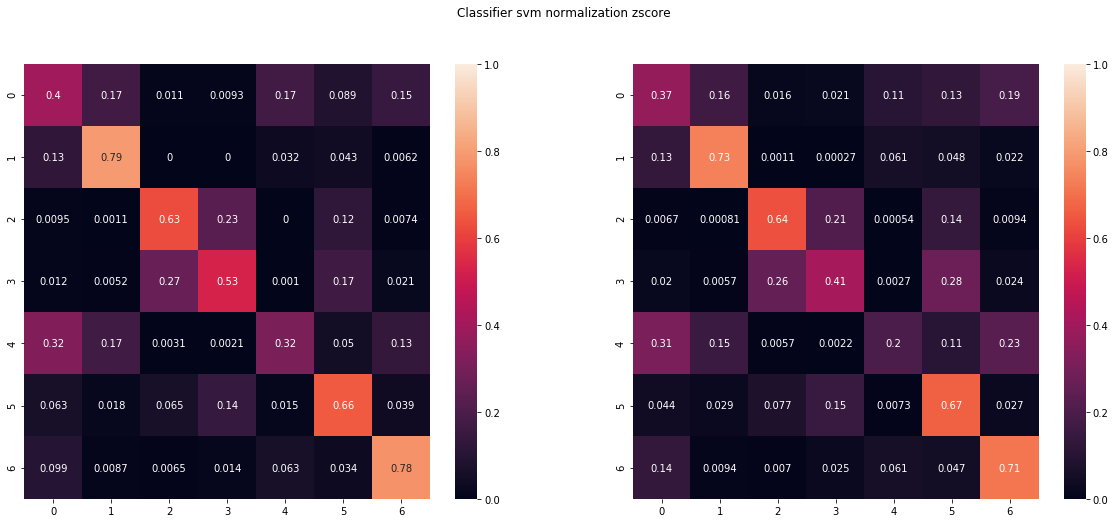

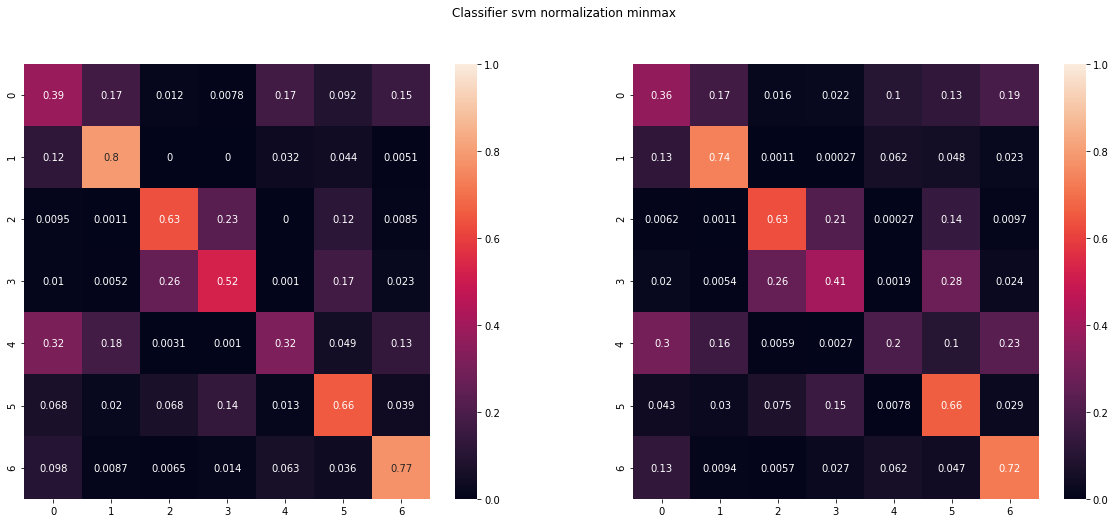

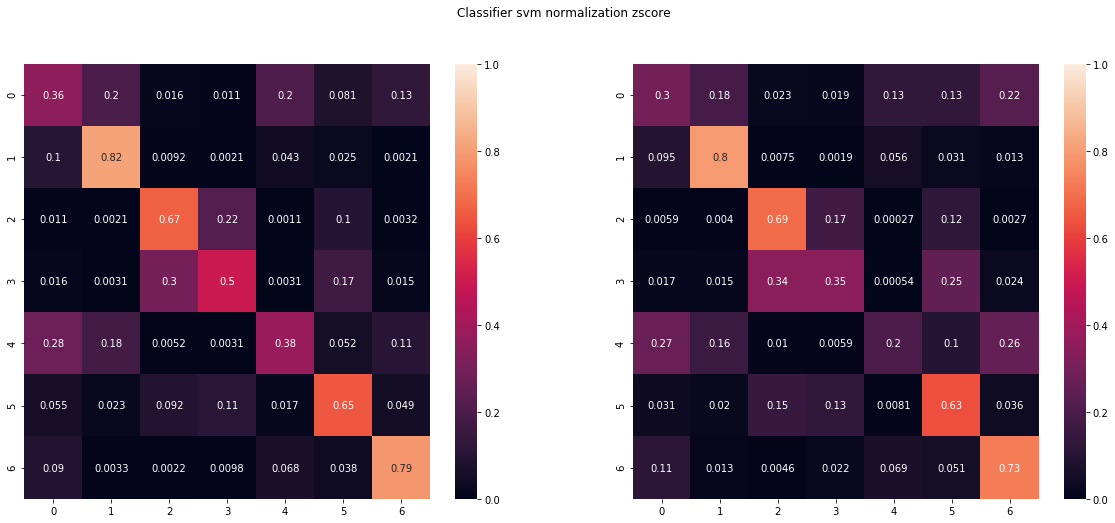

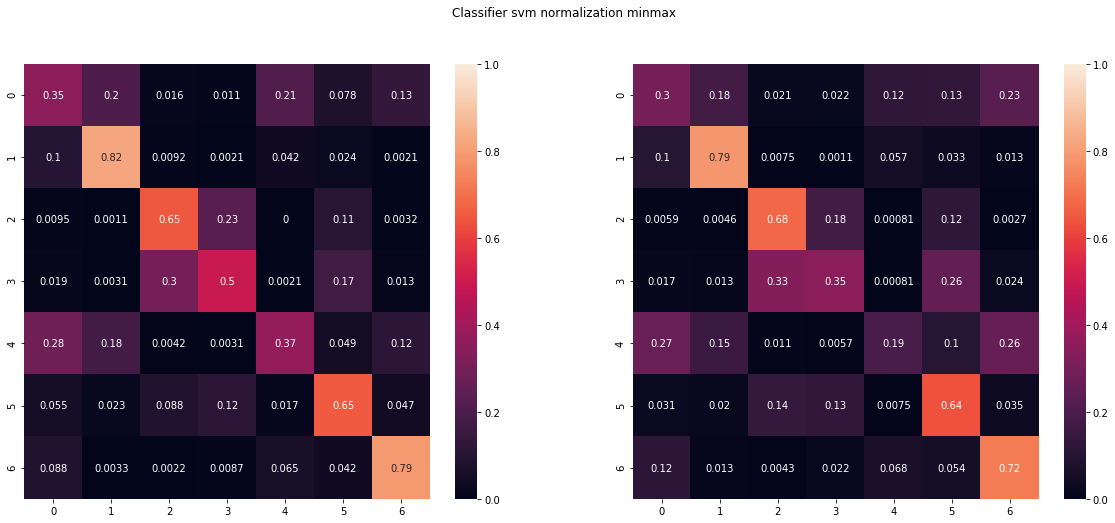

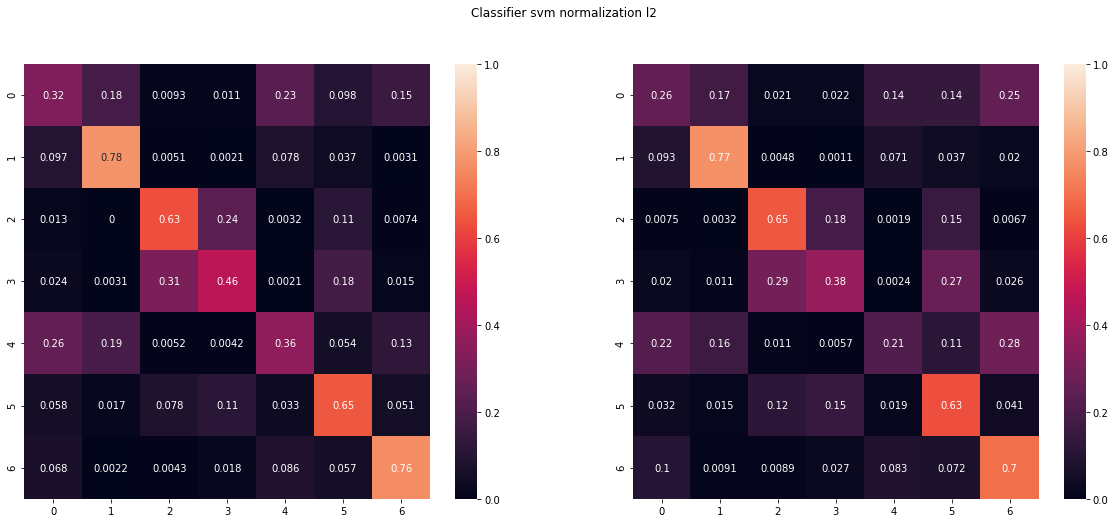

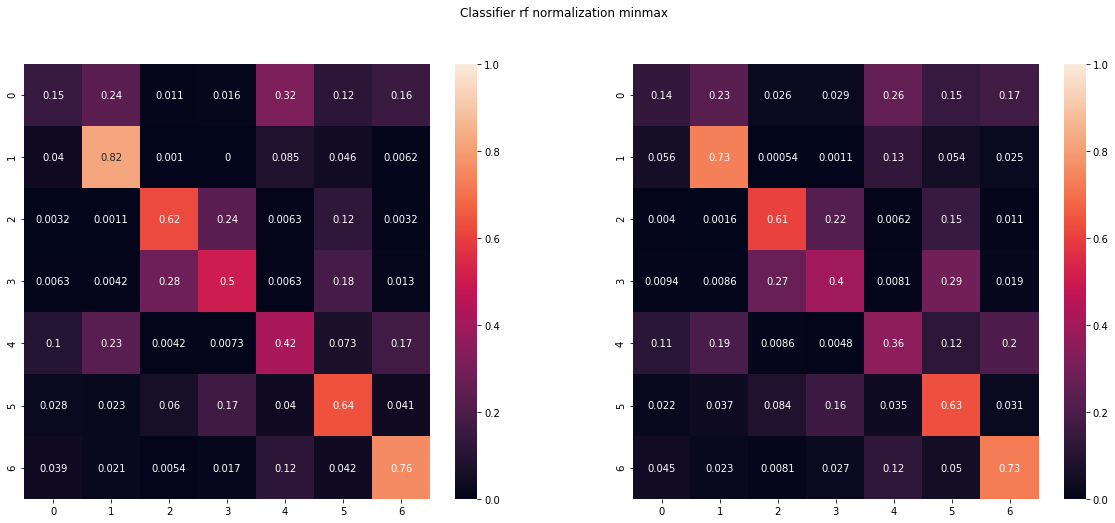

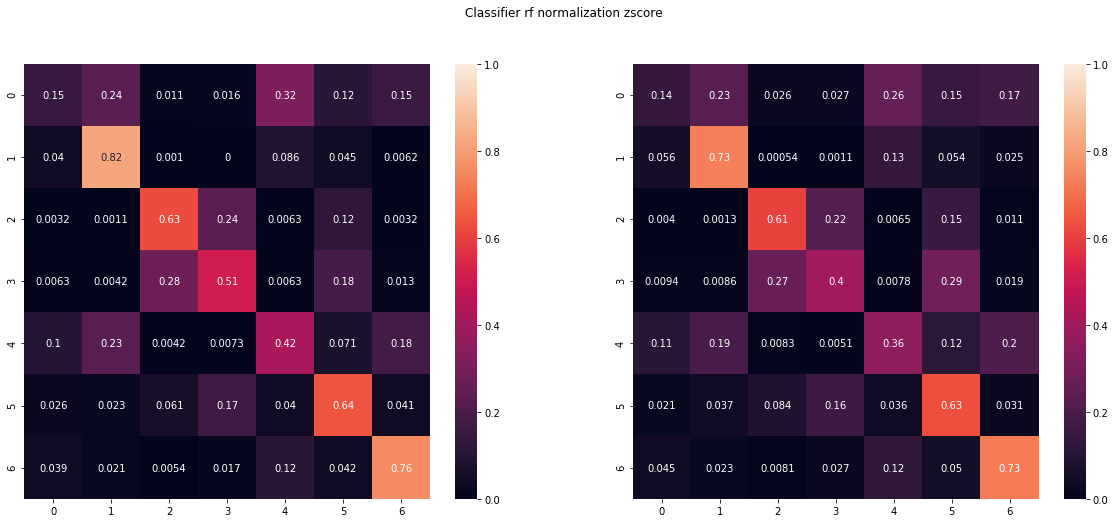

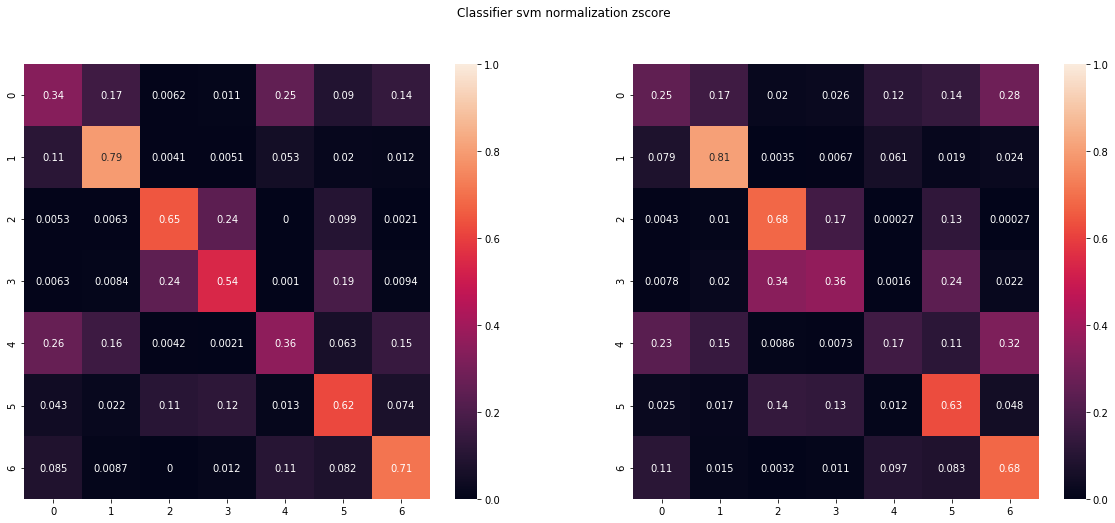

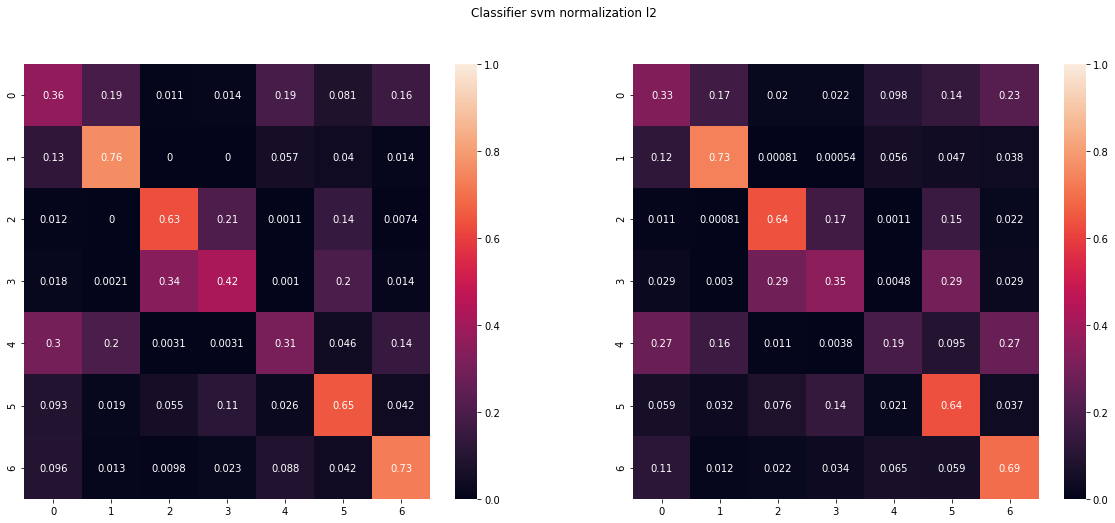

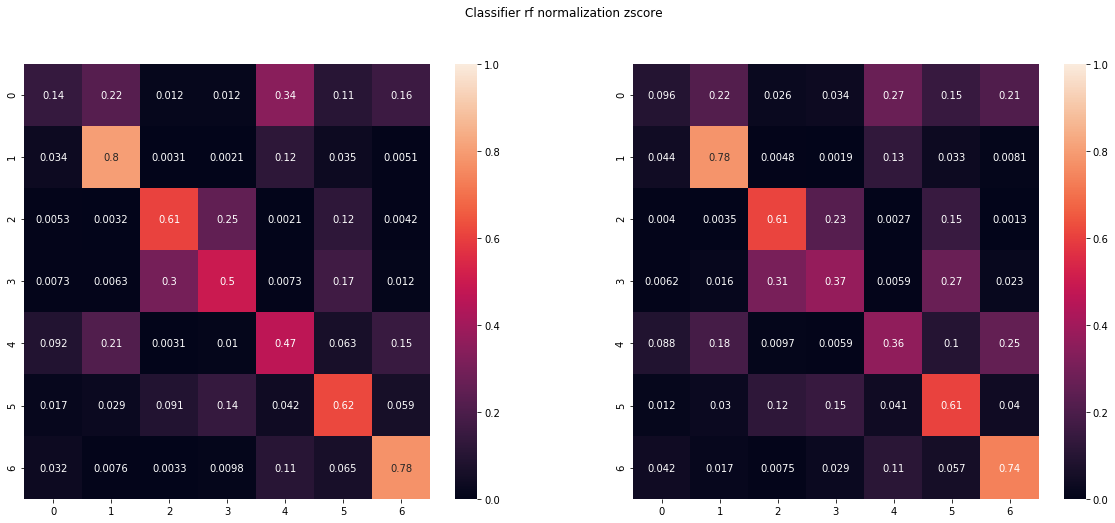

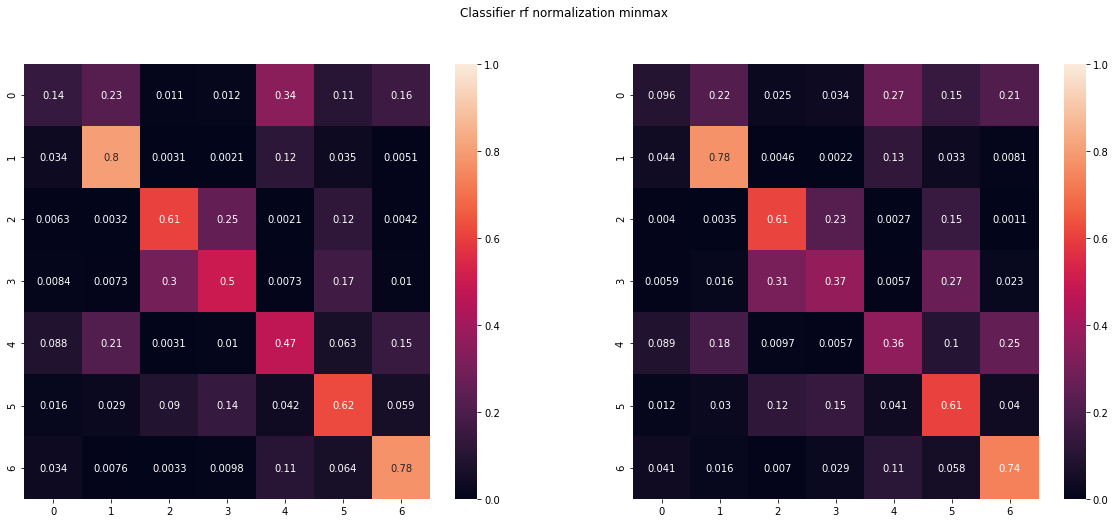

In [12]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier {} normalization {}".format(row['classifier'], row['normalization']))

    #plt.subplot(131)
    #sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(121)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(122)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [13]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("NFFT {} Hop Size {}".format(row['nfft'], row['hop_size']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization zscore
NFFT 512 Hop Size 256
Acc train 0.6006609922767113 Acc dev 0.5853332982377127 Acc eval 0.533691973104552
Classifier svm normalization minmax
NFFT 512 Hop Size 256
Acc train 0.5942886579676198 Acc dev 0.5839269387587657 Acc eval 0.5307878069076197
Classifier svm normalization zscore
NFFT 256 Hop Size 128
Acc train 0.6054037694306634 Acc dev 0.5936269970874636 Acc eval 0.5264768512829846
Classifier svm normalization minmax
NFFT 256 Hop Size 128
Acc train 0.5966693661723926 Acc dev 0.590476822623405 Acc eval 0.5254052531243278
Classifier svm normalization l2
NFFT 256 Hop Size 128
Acc train 0.5736591808836552 Acc dev 0.5673779431334215 Acc eval 0.5135690905610283
Classifier rf normalization minmax
NFFT 512 Hop Size 256
Acc train 1.0 Acc dev 0.5591387329403755 Acc eval 0.5127481918138976
Classifier rf normalization zscore
NFFT 512 Hop Size 256
Acc train 1.0 Acc dev 0.5599686145422571 Acc eval 0.512629661808063
Classifier svm normalization zscore
NFFT 128 

In [ ]:
results_df